# Webinar#9: Deep Learning with Pytorch - Part 1

## Overview

In this notebook, you'll get introduced to [PyTorch](http://pytorch.org/), a framework for building and training neural networks. After a brief introduction to pytorch, we will build a classifier using the perceptron model. We will  then create a deep neural network model to predict house prices using a modified [Kaggle dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). If we have additional time we will train a deep learning model using the [Tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.69269&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

## Tensors

Tensors are the generalization of matrices. A scalar is a 0-dimensional tensor, a vector is a 1-dimensional tensor, a matrix is a 2-dimensional tensor,  any array with three indices is a 3-dimensional tensor, and an array with n (n > 2) indices is an n-dimensional tensor.

<img src="images/tensor.png" width=600px>

<img src="images/tensor_examples.svg" width=600px>

Tensors are the fundamental data structure for neural networks. Any neural network computations are just linear algebra operations on tensors. 

In [1]:
# useful import
import torch
import numpy as np

In [2]:
# a scalar 0-dimensional tensor
my_scalar = torch.tensor(1)

In [3]:
print(my_scalar)

tensor(1)


In [4]:
# get the size
print(my_scalar.size())

torch.Size([])


In [5]:
# get the value
print(my_scalar.item())

1


In [6]:
my_scalar.dtype

torch.int64

In [7]:
# a vector of 9 integers (a 1-dimensional tensor)
my_vector_int = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
# a vector of 9 floating point numbers
my_vector_float = torch.FloatTensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
# get the tensor
print(my_vector_int)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])


In [9]:
my_vector_int.dtype

torch.int64

In [10]:
my_vector_float.dtype

torch.float32

In [11]:
# get the size
print(my_vector_int.shape)

torch.Size([9])


In [12]:
print(my_vector_float)

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])


In [13]:
## convert my int tensor into a numpy array
print(my_vector_int.numpy())

[1 2 3 4 5 6 7 8 9]


In [14]:
## from numpy to tensor
my_array = np.array([1, 2, 3, 4])
torch.from_numpy(my_array)

tensor([1, 2, 3, 4])

In [15]:
# from tensor to numpy
torch.from_numpy(my_array).numpy()

array([1, 2, 3, 4])

In [16]:
# get the datatype
print('My int tensor data type: ', my_vector_int.dtype)
print('My float tensor data type: ', my_vector_float.dtype)

My int tensor data type:  torch.int64
My float tensor data type:  torch.float32


In [17]:
# get the size
print('The size of my int tensor: ', my_vector_int.size())
print('The size of my float tensor: ', my_vector_float.size())

The size of my int tensor:  torch.Size([9])
The size of my float tensor:  torch.Size([9])


In [18]:
# reshape a tensor
my_vector_int.view(3, 3)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [19]:
my_vector_int.view(3, -1)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [20]:
my_vector_int.view(3, 3, -1)

tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]])

In [21]:
my_vector_int.view(3, 3, 1)

tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]])

### Basic tensor operations

Pytorch supports all the basic mathematical operations.

In [22]:
t1 = torch.tensor([1, 2, 3])
t2 = torch.tensor([4, 5, 6])
## addition
print(t1 + t2)

## subtraction 
print(t1 - t2)

##dot product
print(torch.dot(t1, t2))

## scalar multiplication
print(2*t1)

tensor([5, 7, 9])
tensor([-3, -3, -3])
tensor(32)
tensor([2, 4, 6])


In [23]:
# inplace addition
t1.add_(t2)

tensor([5, 7, 9])

In [24]:
# inplace substraction
t1.sub_(t2)

tensor([1, 2, 3])

In [25]:
t1

tensor([1, 2, 3])

### Accessing elements

In term of accessing element, pytorch behave the same way as numpy

In [26]:
my_tensor = torch.arange(0, 9).view(3, 3)

In [27]:
my_tensor

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [28]:
my_tensor.shape

torch.Size([3, 3])

In [29]:
my_tensor[:, 0]

tensor([0, 3, 6])

In [30]:
my_tensor[:,1 ]

tensor([1, 4, 7])

In [31]:
my_tensor3 = torch.arange(18).view(3, 2, 3)

In [32]:
my_tensor3

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])

In [33]:
my_tensor3[1, 0:2, 1]

tensor([ 7, 10])

In [34]:
my_tensor3[:, :, -1]

tensor([[ 2,  5],
        [ 8, 11],
        [14, 17]])

## A perceptron: a single neuron neural network

In this section, we will create a single neuron neural network. We will use it to classify random points that we have generated. As you can see in the figure below, our Perceptron has two input variables - *x1*, *x2* - and a bias term (1). The variables and the bias term will form a linear combination that we will call *h*. *h* will be the input of a non-linear function *f* that will output the predictions.

<img src="images/simple_neuron.png" width=400px>

Mathematically this looks like: 

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}
$$

With vectors this is the dot/inner product of two vectors:

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

We will use the a *Sigmoid* function as our non-linear function

<img src='images/sigmoid.png' />

### Creating the dataset

We will randomly generate data to build our Perceptron.

In [35]:
# useful libraries
from sklearn import datasets
import matplotlib.pyplot as plt
import torch.nn as nn

In [36]:
# number of data points we would like to generate
n_pts = 200

# two centers points for our class
centers = [[-0.5, 0.5], [0.5, -0.5]]

# generate the data
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.3)

In [37]:
print(X[:10], y[:10])

[[ 0.12613401  0.54933237]
 [-0.44568946  0.85335858]
 [-0.46377579  0.72446469]
 [ 0.38727503 -0.91391749]
 [ 0.40284206 -0.55648906]
 [ 0.37957567 -0.29795262]
 [-0.8146975   0.47746382]
 [-0.06654771 -0.83849916]
 [ 0.63076273 -0.5956871 ]
 [ 0.41753674 -0.92482468]] [0 0 0 1 1 1 0 1 1 1]


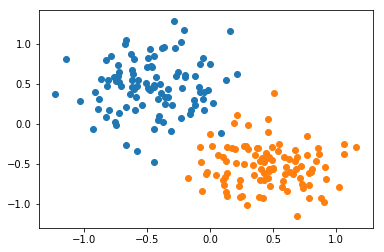

In [38]:
# plot the generated data
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
scatter_plot()
plt.show()

We can see that our data is linearly separable. We will our Perceptron to find the best fit.

In [39]:
# create our tensor
x_data = torch.Tensor(X)
y_data = torch.Tensor(y).view(-1, 1)

In [40]:
# define our perceptron model
class Perceptron(nn.Module):
    """Perceptron model"""
    
    def __init__(self, input_size, output_size):
        """Our perceptron has 2 inputs and 1 output   
        """
        super().__init__()
        
        # h = w_1*x_1 + w_2*x_2 + b
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        """Forward pass.
        
        """
        #  sigmoid(w_1*x_1 + w_2*x_2 + b)
        pred = self.activation(self.linear(x))
        return pred
        
    def activation(self, x):
        """Sigmoid activation function
        """
        return 1/(1 + torch.exp(-x))
    
    def predict(self, x):
        """Predict the out given the input.
        """
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [41]:
# set the seed
torch.manual_seed(1)
# create the model
perceptron = Perceptron(2, 1)

In [42]:
perceptron

Perceptron(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

Before to train our model, let's take a look at the initials parameters

In [43]:
# get the initial parameters(weights (w1, w2) and bias (b))
[w, b] = perceptron.parameters()

In [44]:
# initial tensor value
print(w, b)

Parameter containing:
tensor([[ 0.3643, -0.3121]], requires_grad=True) Parameter containing:
tensor([-0.1371], requires_grad=True)


In [45]:
# initial w
w1, w2 = w.view(2)
print(w1.item(), w2.item())

0.36434608697891235 -0.3121015429496765


In [46]:
# initial b
print(b[0].item())

-0.13708078861236572


In [47]:
# get the parameters
def get_params():
    """get the parameters
    """
    return [w1.item(), w2.item(), b[0].item()]

In [48]:
# 
def plot_fit(title):
    """Plot the fit
    """
    plt.title(title)
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    x2 = (w1*x1 + b1)/ (-w2)
    plt.plot(x1, x2, 'r')
    scatter_plot()
    

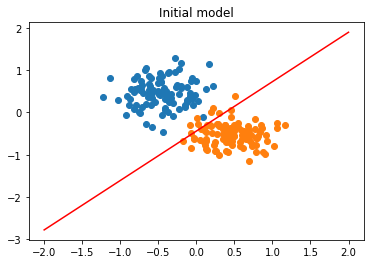

In [49]:
# plot the initial model
plot_fit('Initial model')
plt.show()

Now let's set up our loss. We will use the binary cross entropy loss.

In [50]:
## criterion: binary cross entropy loss
criterion = nn.BCELoss()

## we will use the stochastistic gradient descent
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.01)

In [51]:
# let's train on 1000 epochs
epochs = 1000
losses = []
for i in range(epochs):
    #get the predictions
    y_pred = perceptron.forward(x_data)
    
    # calculate the loss
    loss = criterion(y_pred, y_data)
    print('Epoch: ', i, 'loss: ', loss.item())
    
    # set the gradient to zeros
    optimizer.zero_grad()
    # accumulate loss at each epoch
    losses.append(loss)
    # the backpropagation step: calculate the gradient
    loss.backward()
    # Update the parameters
    optimizer.step()

Epoch:  0 loss:  0.5500900745391846
Epoch:  1 loss:  0.549330472946167
Epoch:  2 loss:  0.5485723614692688
Epoch:  3 loss:  0.5478165745735168
Epoch:  4 loss:  0.5470625162124634
Epoch:  5 loss:  0.5463106036186218
Epoch:  6 loss:  0.5455605983734131
Epoch:  7 loss:  0.5448127388954163
Epoch:  8 loss:  0.5440664887428284
Epoch:  9 loss:  0.5433222651481628
Epoch:  10 loss:  0.5425801873207092
Epoch:  11 loss:  0.5418400764465332
Epoch:  12 loss:  0.5411017537117004
Epoch:  13 loss:  0.5403653979301453
Epoch:  14 loss:  0.5396308898925781
Epoch:  15 loss:  0.5388985872268677
Epoch:  16 loss:  0.5381679534912109
Epoch:  17 loss:  0.5374391674995422
Epoch:  18 loss:  0.5367124676704407
Epoch:  19 loss:  0.5359874963760376
Epoch:  20 loss:  0.5352646112442017
Epoch:  21 loss:  0.5345433354377747
Epoch:  22 loss:  0.5338240265846252
Epoch:  23 loss:  0.5331066846847534
Epoch:  24 loss:  0.5323909521102905
Epoch:  25 loss:  0.5316774845123291
Epoch:  26 loss:  0.5309657454490662
Epoch:  27 l

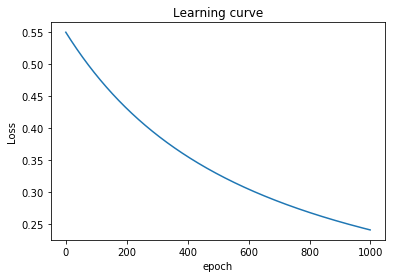

In [52]:
# learning curves
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title('Learning curve')
plt.show()

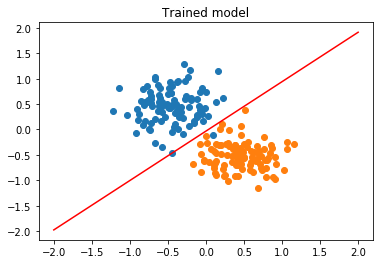

In [53]:
# fit the model
plot_fit('Trained model')
plt.show()

### Predictions

Let's make some prediction on the trained model.

Red point positive probability = 0.9535700082778931
Red point in class 1
Black point negative probability = 0.04226703196763992
Black point in class 0


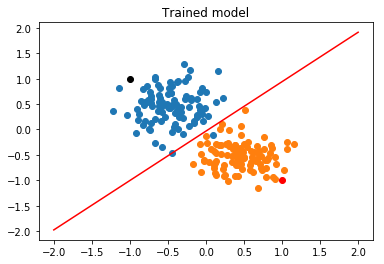

In [54]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("Red point positive probability = {}".format(perceptron.forward(point1).item()))
print(f"Red point in class {perceptron.predict(point1)}")
print("Black point negative probability = {}".format(perceptron.forward(point2).item()))
print(f"Black point in class {perceptron.predict(point2)}")

plot_fit('Trained model')
plt.show()

## Deep Neural Network

In this second part, we will predict housing price using a modified a modified [Kaggle dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). The dataset is already clean. Variables have been scaled and the target variable has been transformed to its log value

In [55]:
# useful library
import pandas as pd
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

### The dataset

In [56]:
training_data = pd.read_csv('data/train_housing_data.csv')

In [57]:
#get the summary
training_data.describe()

,MSSubClass,MSZoning,Neighborhood,OverallQual,OverallCond,YearRemodAdd,RoofStyle,MasVnrType,BsmtQual,BsmtExposure,...,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,LotFrontage,Sale_Price
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,...,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,0.217410,0.676750,0.491975,0.567309,0.573725,0.393954,0.210807,0.294774,0.627093,0.407154,...,0.140284,0.502537,0.205226,0.455708,0.653881,0.572045,0.440830,0.923516,0.417167,12.024081
std,0.248341,0.199509,0.271023,0.154306,0.140292,0.338925,0.400501,0.372583,0.195436,0.266208,...,0.172657,0.222387,0.216310,0.271750,0.251886,0.297676,0.186588,0.256764,0.119700,0.402589
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460242
25%,0.000000,0.750000,0.272727,0.444444,0.500000,0.081967,0.000000,0.000000,0.500000,0.250000,...,0.000000,0.333333,0.000000,0.200000,0.400000,0.333333,0.250000,1.000000,0.388581,11.774713
50%,0.176471,0.750000,0.454545,0.555556,0.500000,0.254098,0.000000,0.000000,0.750000,0.250000,...,0.000000,0.333333,0.333333,0.400000,0.800000,0.666667,0.500000,1.000000,0.406640,12.001505
75%,0.294118,0.750000,0.681818,0.666667,0.625000,0.688525,0.000000,0.666667,0.750000,0.500000,...,0.333333,0.666667,0.333333,0.800000,0.800000,0.666667,0.500000,1.000000,0.490408,12.278393
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.534473


In [58]:
training_data.head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,OverallCond,YearRemodAdd,RoofStyle,MasVnrType,BsmtQual,BsmtExposure,...,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,LotFrontage,Sale_Price
0,0.000000,0.75,0.863636,0.777778,0.50,0.049180,0.0,0.000000,0.75,0.75,...,0.000000,0.666667,0.000000,0.2,0.8,1.000000,0.75,1.0,0.461171,12.211060
1,0.000000,0.75,0.363636,0.444444,0.75,0.049180,0.0,0.666667,0.50,0.25,...,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.25,1.0,0.456066,11.887931
2,0.588235,0.75,0.954545,0.888889,0.50,0.098361,1.0,0.666667,1.00,0.25,...,0.333333,1.000000,0.333333,0.8,0.8,0.666667,0.50,1.0,0.394699,12.675764
3,0.000000,0.75,0.454545,0.666667,0.50,0.163934,0.0,0.000000,0.75,1.00,...,0.333333,0.666667,0.333333,0.4,0.8,0.666667,0.50,1.0,0.388581,12.278393
4,0.000000,0.75,0.363636,0.555556,0.50,0.737705,0.0,0.666667,0.50,0.25,...,0.000000,0.333333,0.333333,0.8,0.8,0.666667,0.50,1.0,0.577658,12.103486


In [59]:
# variables
training_data.columns

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'BsmtQual', 'BsmtExposure',
       'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'PavedDrive', 'LotFrontage',
       'Sale_Price'],
      dtype='object')

### Variable descriptions

- **1 - SalePrice - **The property's sale price. This is the target variable that we're trying to predict.
- **2 - MSSubClass - **The building class.
- **3 - MSZoning - **The general zoning classification.
- **4 - Neighborhood - **Physical locations within Ames city limits.
- **5 - OverallQual - **Overall material and finish quality.
- **6 - OverallCond - **Overall condition rating.
- **7 - YearRemodAdd - **Remodel date.
- **8 - RoofStyle - **Type of roof.
- **9 - MasVnrType - **Masonry veneer type.
- **10 - BsmtQual - **Height of the basement.
- **11 - BsmtExposure -**Walkout or garden level basement walls.
- **12 - HeatingQC -**Heating quality and condition.
- **13 - CentralAir - **Central air conditioning.
- **14 - 1stFlrSF -**First Floor square feet.
- **15 - GrLivArea -**Above grade (ground) living area square feet.
- **16 - BsmtFullBath -**Basement full bathrooms.
- **17 - KitchenQual -**Kitchen quality.
- **18 - Fireplaces -**Number of fireplaces.
- **19 - FireplaceQu -**Fireplace quality.
- **20 - GarageType -**Garage location.
- **21 - GarageFinish -**Interior finish of the garage.
- **22 - GarageCars -**Size of garage in car capacity.
- **23 - PavedDrive -**Paved driveway.
- **24 - LotFrontage -**Linear feet of street connected to property.


To efficiently manage our data, we will create a generator, that we will then pass to a dataloader.

In [60]:
class HousingDataset(Dataset):
    """Housing dataset"""
    
    #Initialize dataset
    def __init__(self, filepath):
        dat = pd.read_csv(filepath).values.astype('float64')
        self.len = dat.shape[0]
        self.x_data = torch.from_numpy(dat[:, 0:-1])
        self.y_data = torch.from_numpy(dat[:, [-1]])
        
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    def __len__(self):
        return self.len

In [61]:
train_dataset = HousingDataset('data/train_housing_data.csv')
test_dataset = HousingDataset('data/test_housing_data.csv')
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset,batch_size=32, shuffle=True)

### The model

<img src='images/network.png'/>

In [62]:
n_inputs=24

In [63]:
class HousingModel(nn.Module):
    """Housing prices model"""
    
    def __init__(self):
        super(HousingModel, self).__init__()
        self.layer1 = torch.nn.Linear(n_inputs-1, 200)
        self.layer2 = torch.nn.Linear(200, 100)
        self.layer3 = torch.nn.Linear(100, 50)
        self.layer4 = torch.nn.Linear(50, 25)
        self.layer5 = torch.nn.Linear(25, 1)
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        out1 = self.relu(self.layer1(x))
        out2 = self.relu(self.layer2(out1))
        out3 = self.relu(self.layer3(out2))
        out4 = self.relu(self.layer4(out3))
        y_pred = self.layer5(out4)
        
        return y_pred

In [64]:
housingModel = HousingModel()

In [65]:
housingModel.parameters

<bound method Module.parameters of HousingModel(
  (layer1): Linear(in_features=23, out_features=200, bias=True)
  (layer2): Linear(in_features=200, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=50, bias=True)
  (layer4): Linear(in_features=50, out_features=25, bias=True)
  (layer5): Linear(in_features=25, out_features=1, bias=True)
  (relu): ReLU()
)>

### Training

In [66]:
learning_rate = 1e-4
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(housingModel.parameters(), lr=learning_rate)

In [67]:
train_losses = []
test_losses = []
for epoch in range(100):
    train_loss = []
    test_loss = []
    
    # training
    for inputs, target in train_loader:
        # wrap them into a variable
        inputs, target = Variable(inputs.float()),  Variable(target.float())
        
        
        # Forward pass: compute the predicted y by passing x to the model
        y_pred = housingModel(inputs)
        
        # compute and print loss
        loss = criterion(y_pred, target)
        train_loss.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # validation  
    for  test_inputs, test_target in test_loader:
        test_inputs = Variable(test_inputs.float())
        test_target = Variable(test_target.float())
        test_pred = housingModel(test_inputs)
        loss = criterion(test_pred, test_target)
        test_loss.append(loss.data.item())
       
    test_losses.append(np.mean(test_loss))
       
    # compute the loss
    train_losses.append(np.mean(train_loss))
    print('epoch: ', epoch, "Train loss: ", np.mean(train_loss), "Test loss: ", np.mean(test_loss))
    
        

epoch:  0 Train loss:  141.466101147 Test loss:  140.246252441
epoch:  1 Train loss:  138.390327817 Test loss:  135.492626953
epoch:  2 Train loss:  129.264312381 Test loss:  119.117977905
epoch:  3 Train loss:  98.566939581 Test loss:  69.0539657593
epoch:  4 Train loss:  35.7734587193 Test loss:  6.93647623062
epoch:  5 Train loss:  3.12133045814 Test loss:  1.87117242813
epoch:  6 Train loss:  2.1857706578 Test loss:  1.62400795221
epoch:  7 Train loss:  1.96117697585 Test loss:  1.53538947105
epoch:  8 Train loss:  1.77949495543 Test loss:  1.37082176208
epoch:  9 Train loss:  1.54224515955 Test loss:  1.25311367512
epoch:  10 Train loss:  1.34041862261 Test loss:  1.11103637218
epoch:  11 Train loss:  1.14350085901 Test loss:  0.954126513004
epoch:  12 Train loss:  1.00863240446 Test loss:  0.880593430996
epoch:  13 Train loss:  0.907609210128 Test loss:  0.747069495916
epoch:  14 Train loss:  0.743778191152 Test loss:  0.736279177666
epoch:  15 Train loss:  0.653859464186 Test lo

In [68]:
import matplotlib.pyplot as plt
plt.plot(range(90), train_losses[10:], 'r')
plt.plot(range(90), test_losses[10:], 'b')
plt.gca().legend(('training loss','validation loss'))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning curve')

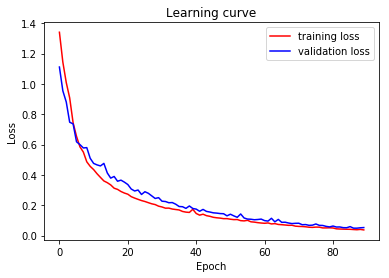

In [69]:
plt.show()

## Train a deep neural network on the Tensorflow playground

Follow the following link: [Tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.69269&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).